<a href="https://colab.research.google.com/github/Sirfowahid/DL_Project_01/blob/main/MNIST_Experiment_Optimizers%26LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display

display.set_matplotlib_formats('svg')

In [4]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')
labels = data[:,0]
data = data[:,1:]
dataNorm = data/np.max(data)

labels.shape,data.shape,labels[0:5]

((20000,), (20000, 784), array([6., 5., 7., 9., 5.]))

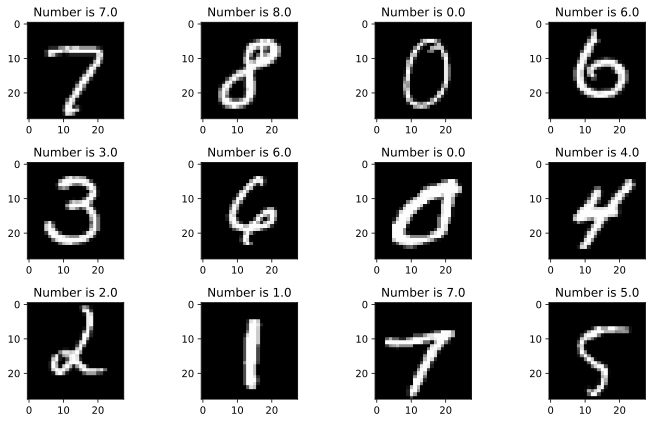

In [7]:
fig,axs = plt.subplots(3,4,figsize=(10,6))

for ax in axs.flatten():
  index = np.random.randint(low=0,high=data.shape[0])
  pixels = data[index,:]
  img = np.reshape(pixels,(28,28))
  ax.imshow(img,cmap='gray')
  ax.set_title(f'Number is {labels[index]}')

plt.tight_layout()
plt.show()

In [8]:
def createModel(optimizer,learning_rate):
  class neuralNetwork(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,128)
      self.fc1 = nn.Linear(128,64)
      self.fc2 = nn.Linear(64,32)
      self.output = nn.Linear(32,10)
      
    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      return self.output(x)
  
  network = neuralNetwork()
  optimizerfunc = np.getattr(torch.optim,optimizer)
  optimizer = optimizerfunc(network.parameters(),lr=learning_rate)
  lossfun = nn.CrossEntropyLoss()

  return network,optimizer,lossfun
    